In [1]:
import pandas as pd
import ast
import re 
import string
import tweepy
import time
import ast
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [2]:
df = pd.read_excel("scraped_tweets.xlsx")
print(df.shape)
df.head()

(1964, 10)


,username,description,location,following,followers,text,likescount,retweetcount,date-time,hashtags
0,peoplefindinc,PeopleFind Inc. is an Executive Search and Outplacement / Career Transition firm committed to the delivery of outstanding results.,NaN,360,317,We are #hiring STORE MANAGER - LADIES FASHION - GENEROUS INCOME AND GREAT POTENTIAL https://t.co/GTMbCvUQx0 #jobs #Tsawwassen,0,0,2021-04-29 05:41:34,"['SOAP', 'REST', 'hiring', 'jobs', 'Tsawwassen']"
1,devvibesbot,WebDev Retweet bot Made by @dinoknowsbetter | @webarchitectstm,NaN,2,3474,RT @Cloudcrem: https://t.co/vhuqxcM3Lr automate posting facebook groups and pages selenium python 9#recruitment #Careers #Jobs #hiring #…,0,1,2021-04-29 05:41:25,"['SOAP', 'REST', 'hiring', 'jobs', 'Tsawwassen', 'Careers', 'Jobs', 'hiring']"
2,appitekbot,"hello, my name is asimov, I am a bot!\nI retweet #salesforce, #sfdc, and #salesforcedev! \n\nbuilt with ❤ by @appitekltd",The Cloud,1,1134,RT @Cloudcrem: 3#recruitment #Careers #Jobs #hiring #vacancies #tech #techjobs #technology #manchester #manchesterjobs #mancs #developer #d…,0,2,2021-04-29 05:41:20,"['SOAP', 'REST', 'hiring', 'jobs', 'Tsawwassen', 'Careers', 'Jobs', 'hiring', 'Careers', 'Jobs', 'hiring', 'vacancies', 'tech', 'techjobs', 'technology', 'manchester', 'manchesterjobs', 'mancs', 'developer']"
3,devvibesbot,WebDev Retweet bot Made by @dinoknowsbetter | @webarchitectstm,NaN,2,3474,RT @Cloudcrem: 3#recruitment #Careers #Jobs #hiring #vacancies #tech #techjobs #technology #manchester #manchesterjobs #mancs #developer #d…,0,2,2021-04-29 05:41:14,"['SOAP', 'REST', 'hiring', 'jobs', 'Tsawwassen', 'Careers', 'Jobs', 'hiring', 'Careers', 'Jobs', 'hiring', 'vacancies', 'tech', 'techjobs', 'technology', 'manchester', 'manchesterjobs', 'mancs', 'developer', 'Careers', 'Jobs', 'hiring', 'vacancies', 'tech', 'techjobs', 'technology', 'manchester', 'manchesterjobs', 'mancs', 'developer']"
4,peoplefindinc,PeopleFind Inc. is an Executive Search and Outplacement / Career Transition firm committed to the delivery of outstanding results.,NaN,360,317,We are #hiring STORE MANAGER - LADIES FASHION - GENEROUS INCOME AND GREAT POTENTIAL https://t.co/BF2lTjG0va #jobs #Delta,0,0,2021-04-29 05:40:55,"['SOAP', 'REST', 'hiring', 'jobs', 'Tsawwassen', 'Careers', 'Jobs', 'hiring', 'Careers', 'Jobs', 'hiring', 'vacancies', 'tech', 'techjobs', 'technology', 'manchester', 'manchesterjobs', 'mancs', 'developer', 'Careers', 'Jobs', 'hiring', 'vacancies', 'tech', 'techjobs', 'technology', 'manchester', 'manchesterjobs', 'mancs', 'developer', 'hiring', 'jobs', 'Delta']"


In [3]:
df.isnull().sum()

username          0
description      97
location        384
following         0
followers         0
text              0
likescount        0
retweetcount      0
date-time         0
hashtags          0
dtype: int64

In [4]:
df.dropna(inplace= True, axis= 0)
df.isnull().sum()

username        0
description     0
location        0
following       0
followers       0
text            0
likescount      0
retweetcount    0
date-time       0
hashtags        0
dtype: int64

In [5]:
# Checking for duplicates
df.duplicated().sum()

1

In [6]:
df[df.duplicated()]

username  \
1879  cont_learn   

                                                                                                                            description  \
1879  My name is Chris Sams. I'm a junior software developer.  This is my bot profile for topics related to programming and technology.   

               location  following  followers  \
1879  Mission Viejo, CA         22        324   

                                                                                                                                              text  \
1879  RT @jcgsville: In engineering, we're looking for experienced, product-oriented frontend and backend developers to help us build out even mo…   

      likescount  retweetcount            date-time  \
1879           0             7  2021-04-28 20:00:01   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         

In [7]:
if df.duplicated().sum() > 0:
    df.drop_duplicates(inplace= True)

In [8]:
df.duplicated().sum()

0

In [9]:
df = df.applymap(lambda s:s.lower() if type(s) == str else s)
df.head()

,username,description,location,following,followers,text,likescount,retweetcount,date-time,hashtags
2,appitekbot,"hello, my name is asimov, i am a bot!\ni retweet #salesforce, #sfdc, and #salesforcedev! \n\nbuilt with ❤ by @appitekltd",the cloud,1,1134,rt @cloudcrem: 3#recruitment #careers #jobs #hiring #vacancies #tech #techjobs #technology #manchester #manchesterjobs #mancs #developer #d…,0,2,2021-04-29 05:41:20,"['soap', 'rest', 'hiring', 'jobs', 'tsawwassen', 'careers', 'jobs', 'hiring', 'careers', 'jobs', 'hiring', 'vacancies', 'tech', 'techjobs', 'technology', 'manchester', 'manchesterjobs', 'mancs', 'developer']"
5,omermolad,"israeli in melbourne. co-founder and ceo @vervoehq. we make hiring about merit, not background. living the dream.","melbourne, most of the time",297,541,hiring is really starting to ramp up at @vervoehq right now:\n\n- senior account exec 🚀\n- sales development rep 🧨\n- marketing designer 👩🏽‍🎨\n\nwant in? \n\n#hiring #nowhiring #jobs #sales #designerjobs #salesjobs,0,0,2021-04-29 05:40:41,"['soap', 'rest', 'hiring', 'jobs', 'tsawwassen', 'careers', 'jobs', 'hiring', 'careers', 'jobs', 'hiring', 'vacancies', 'tech', 'techjobs', 'technology', 'manchester', 'manchesterjobs', 'mancs', 'developer', 'careers', 'jobs', 'hiring', 'vacancies', 'tech', 'techjobs', 'technology', 'manchester', 'manchesterjobs', 'mancs', 'developer', 'hiring', 'jobs', 'delta', 'hiring', 'nowhiring', 'jobs', 'sales', 'designerjobs', 'salesjobs']"
6,educationemploy,👩‍🏫👨‍🏫👩‍🎓👨‍🎓,india,91,46,find your career interest @educationemployment. upload your resume and start getting notified on multiple job opportunities.\nvisit us: https://t.co/8zckcodb9d\n\n#educationemployment #educationjobs #employment #jobs #jobsearch #hiring #job #recruitment #career #work #resume https://t.co/ddneigu3hw,0,0,2021-04-29 05:39:09,"['soap', 'rest', 'hiring', 'jobs', 'tsawwassen', 'careers', 'jobs', 'hiring', 'careers', 'jobs', 'hiring', 'vacancies', 'tech', 'techjobs', 'technology', 'manchester', 'manchesterjobs', 'mancs', 'developer', 'careers', 'jobs', 'hiring', 'vacancies', 'tech', 'techjobs', 'technology', 'manchester', 'manchesterjobs', 'mancs', 'developer', 'hiring', 'jobs', 'delta', 'hiring', 'nowhiring', 'jobs', 'sales', 'designerjobs', 'salesjobs', 'educationemployment', 'educationjobs', 'employment', 'jobs', 'jobsearch', 'hiring', 'job', 'recruitment', 'career', 'work', 'resume']"
8,vacancies_bot,just a bot that re-tweets everything related to #vacancies.,"london, england",5,2285,rt @cloudcrem: #react free tutorial react state https://t.co/qxyg0hdgny 9#recruitment #careers #jobs #hiring #vacancies #tech #techjobs #…,0,2,2021-04-29 05:38:23,"['soap', 'rest', 'hiring', 'jobs', 'tsawwassen', 'careers', 'jobs', 'hiring', 'careers', 'jobs', 'hiring', 'vacancies', 'tech', 'techjobs', 'technology', 'manchester', 'manchesterjobs', 'mancs', 'developer', 'careers', 'jobs', 'hiring', 'vacancies', 'tech', 'techjobs', 'technology', 'manchester', 'manchesterjobs', 'mancs', 'developer', 'hiring', 'jobs', 'delta', 'hiring', 'nowhiring', 'jobs', 'sales', 'designerjobs', 'salesjobs', 'educationemployment', 'educationjobs', 'employment', 'jobs', 'jobsearch', 'hiring', 'job', 'recruitment', 'career', 'work', 'resume', 'hiring', 'jobs', 'vancouver', 'react', 'careers', 'jobs', 'hiring', 'vacancies', 'tech', 'techjobs']"
13,calendarus,"calendar connect us connects people seeking jobs to businesses hiring temporary help, part-time help, full-time employment. #jobseeker #employment #jobs #hiring",usa,94,96,listen to some great music from: mama lenny and the remedy @mlrxmusic: calendar connect us (https://t.co/aw2xg83cxd) has teamed up with @7522radio to help you #jobsearch and #findajob. #employment #hiring #jobs https://t.co/qdwgkujzwe https://t.co/sxoivkafvp,0,0,2021-04-29 05:32:03,"['soap', 'rest', 'hiring', 'jobs', 'tsawwassen', 'careers', 'jobs', 'hiring', 'careers', 'jobs', 'hiring', 'vacancies', 'tech', 'techjobs', 'technology', 'manchester', 'manchesterjobs', 

In [10]:
df.isnull().sum()

username        0
description     0
location        0
following       0
followers       0
text            0
likescount      0
retweetcount    0
date-time       0
hashtags        0
dtype: int64

In [11]:
df.dropna(inplace= True, axis= 0)
df.isnull().sum()

username        0
description     0
location        0
following       0
followers       0
text            0
likescount      0
retweetcount    0
date-time       0
hashtags        0
dtype: int64

In [12]:
df.drop(['location'], axis = 1, inplace = True)
df.shape

(1534, 9)

In [13]:
df.shape

(1534, 9)

In [14]:
df.shape

(1534, 9)

## Basic feature extraction using text data

In [15]:
# Core packages for text processing.

import string
import re

# Libraries for text preprocessing.

import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/himani/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/himani/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/himani/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /Users/himani/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [16]:
stop = set(stopwords.words('english'))

In [17]:
# Average word length of the tweet
def avg_word(sentence):
    words = sentence.split()
    return (sum(len(word) for word in words)/len(words))

df['avg_word'] = df['text'].apply(lambda x: avg_word(x))
df[['text','avg_word']].head()

,text,avg_word
2,rt @cloudcrem: 3#recruitment #careers #jobs #hiring #vacancies #tech #techjobs #technology #manchester #manchesterjobs #mancs #developer #d…,8.400000
5,hiring is really starting to ramp up at @vervoehq right now:\n\n- senior account exec 🚀\n- sales development rep 🧨\n- marketing designer 👩🏽‍🎨\n\nwant in? \n\n#hiring #nowhiring #jobs #sales #designerjobs #salesjobs,5.151515
6,find your career interest @educationemployment. upload your resume and start getting notified on multiple job opportunities.\nvisit us: https://t.co/8zckcodb9d\n\n#educationemployment #educationjobs #employment #jobs #jobsearch #hiring #job #recruitment #career #work #resume https://t.co/ddneigu3hw,8.548387
8,rt @cloudcrem: #react free tutorial react state https://t.co/qxyg0hdgny 9#recruitment #careers #jobs #hiring #vacancies #tech #techjobs #…,7.687500
13,listen to some great music from: mama lenny and the remedy @mlrxmusic: calendar connect us (https://t.co/aw2xg83cxd) has teamed up with @7522radio to help you #jobsearch and #findajob. #employment #hiring #jobs https://t.co/qdwgkujzwe https://t.co/sxoivkafvp,7.093750


In [18]:
# Number of stopwords in the tweet
df['stopwords'] = df['text'].apply(lambda x: len([x for x in x.split() if x in stop]))
df[['text','stopwords']].head()

,text,stopwords
2,rt @cloudcrem: 3#recruitment #careers #jobs #hiring #vacancies #tech #techjobs #technology #manchester #manchesterjobs #mancs #developer #d…,0
5,hiring is really starting to ramp up at @vervoehq right now:\n\n- senior account exec 🚀\n- sales development rep 🧨\n- marketing designer 👩🏽‍🎨\n\nwant in? \n\n#hiring #nowhiring #jobs #sales #designerjobs #salesjobs,4
6,find your career interest @educationemployment. upload your resume and start getting notified on multiple job opportunities.\nvisit us: https://t.co/8zckcodb9d\n\n#educationemployment #educationjobs #employment #jobs #jobsearch #hiring #job #recruitment #career #work #resume https://t.co/ddneigu3hw,4
8,rt @cloudcrem: #react free tutorial react state https://t.co/qxyg0hdgny 9#recruitment #careers #jobs #hiring #vacancies #tech #techjobs #…,0
13,listen to some great music from: mama lenny and the remedy @mlrxmusic: calendar connect us (https://t.co/aw2xg83cxd) has teamed up with @7522radio to help you #jobsearch and #findajob. #employment #hiring #jobs https://t.co/qdwgkujzwe https://t.co/sxoivkafvp,10


In [19]:
def remove_URL(description):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'', description)


def remove_emoji(description):
    emoji_pattern = re.compile(
        '['
         u"\U0001F600-\U0001F64F"  # emoticons
         u"\U0001F300-\U0001F5FF"  # symbols & pictographs
         u"\U0001F680-\U0001F6FF"  # transport & map symbols
         u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
         u"\U00002500-\U00002BEF"  # chinese char
         u"\U00002702-\U000027B0"
         u"\U00002702-\U000027B0"
         u"\U000024C2-\U0001F251"
         u"\U0001f926-\U0001f937"
         u"\U00010000-\U0010ffff"
         u"\u2640-\u2642"
         u"\u2600-\u2B55"
         u"\u200d"
         u"\u23cf"
         u"\u23e9"
         u"\u231a"
         u"\ufe0f"  # dingbats
         u"\u3030"
        ']+',
        flags=re.UNICODE)
    return emoji_pattern.sub(r'', description)


def remove_html(description):
    html = re.compile(r'<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});')
    return re.sub(html, '', description)

def remove_punct(description):
    table = str.maketrans('', '', string.punctuation)
    return description.translate(table)

In [20]:
# Applying helper functions
df['description_clean'] = df['description'].apply(lambda x: remove_URL(x))
df['description_clean'] = df['description_clean'].apply(lambda x: remove_emoji(x))
df['description_clean'] = df['description_clean'].apply(lambda x: remove_html(x))
df['description_clean'] = df['description_clean'].apply(lambda x: remove_punct(x))

In [21]:
df['description_clean'] = df['description_clean'].replace('\n','', regex = True)

In [22]:
df['text_clean'] = df['text'].apply(lambda x: remove_URL(x))
df['text_clean'] = df['text_clean'].apply(lambda x: remove_emoji(x))
df['text_clean'] = df['text_clean'].apply(lambda x: remove_html(x))
df['text_clean'] = df['text_clean'].apply(lambda x: remove_punct(x))

In [23]:
df['text_clean'] = df['text_clean'].replace(['\n','rt', '#' ],'', regex = True)

In [24]:
df.head()

,username,description,following,followers,text,likescount,retweetcount,date-time,hashtags,avg_word,stopwords,description_clean,text_clean
2,appitekbot,"hello, my name is asimov, i am a bot!\ni retweet #salesforce, #sfdc, and #salesforcedev! \n\nbuilt with ❤ by @appitekltd",1,1134,rt @cloudcrem: 3#recruitment #careers #jobs #hiring #vacancies #tech #techjobs #technology #manchester #manchesterjobs #mancs #developer #d…,0,2,2021-04-29 05:41:20,"['soap', 'rest', 'hiring', 'jobs', 'tsawwassen', 'careers', 'jobs', 'hiring', 'careers', 'jobs', 'hiring', 'vacancies', 'tech', 'techjobs', 'technology', 'manchester', 'manchesterjobs', 'mancs', 'developer']",8.400000,0,hello my name is asimov i am a boti retweet salesforce sfdc and salesforcedev built with by appitekltd,cloudcrem 3recruitment careers jobs hiring vacancies tech techjobs technology manchester manchesterjobs mancs developer d…
5,omermolad,"israeli in melbourne. co-founder and ceo @vervoehq. we make hiring about merit, not background. living the dream.",297,541,hiring is really starting to ramp up at @vervoehq right now:\n\n- senior account exec 🚀\n- sales development rep 🧨\n- marketing designer 👩🏽‍🎨\n\nwant in? \n\n#hiring #nowhiring #jobs #sales #designerjobs #salesjobs,0,0,2021-04-29 05:40:41,"['soap', 'rest', 'hiring', 'jobs', 'tsawwassen', 'careers', 'jobs', 'hiring', 'careers', 'jobs', 'hiring', 'vacancies', 'tech', 'techjobs', 'technology', 'manchester', 'manchesterjobs', 'mancs', 'developer', 'careers', 'jobs', 'hiring', 'vacancies', 'tech', 'techjobs', 'technology', 'manchester', 'manchesterjobs', 'mancs', 'developer', 'hiring', 'jobs', 'delta', 'hiring', 'nowhiring', 'jobs', 'sales', 'designerjobs', 'salesjobs']",5.151515,4,israeli in melbourne cofounder and ceo vervoehq we make hiring about merit not background living the dream,hiring is really staing to ramp up at vervoehq right now senior account exec sales development rep marketing designer want in hiring nowhiring jobs sales designerjobs salesjobs
6,educationemploy,👩‍🏫👨‍🏫👩‍🎓👨‍🎓,91,46,find your career interest @educationemployment. upload your resume and start getting notified on multiple job opportunities.\nvisit us: https://t.co/8zckcodb9d\n\n#educationemployment #educationjobs #employment #jobs #jobsearch #hiring #job #recruitment #career #work #resume https://t.co/ddneigu3hw,0,0,2021-04-29 05:39:09,"['soap', 'rest', 'hiring', 'jobs', 'tsawwassen', 'careers', 'jobs', 'hiring', 'careers', 'jobs', 'hiring', 'vacancies', 'tech', 'techjobs', 'technology', 'manchester', 'manchesterjobs', 'mancs', 'developer', 'careers', 'jobs', 'hiring', 'vacancies', 'tech', 'techjobs', 'technology', 'manchester', 'manchesterjobs', 'mancs', 'developer', 'hiring', 'jobs', 'delta', 'hiring', 'nowhiring', 'jobs', 'sales', 'designerjobs', 'salesjobs', 'educationemployment', 'educationjobs', 'employment', 'jobs', 'jobsearch', 'hiring', 'job', 'recruitment', 'career', 'work', 'resume']",8.548387,4,,find your career interest educationemployment upload your resume and sta getting notified on multiple job oppounitiesvisit us educationemployment educationjobs employment jobs jobsearch hiring job recruitment career work resume
8,vacancies_bot,just a bot that re-tweets everything related to #vacancies.,5,2285,rt @cloudcrem: #react free tutorial react state https://t.co/qxyg0hdgny 9#recruitment #careers #jobs #hiring #vacancies #tech #techjobs #…,0,2,2021-04-29 05:38:23,"['soap', 'rest', 'hiring', 'jobs', 'tsawwassen', 'careers', 'jobs', 'hiring', 'careers', 'jobs', 'hiring', 'vacancies', 'tech', 'techjobs', 'technology', 'manchester', 'manchesterjobs', 'mancs', 'developer', 'careers', 'jobs', 'hiring', 'vacancies', 'tech', 'techjobs', 'technology', 'manchester', 'manchesterjobs', 'mancs', 'developer', 'hiring', 'jobs', 'delta', 'hiring', 'nowhiring', 'jobs', 'sales', 'designerjobs', 'salesjobs', 'educationemployment', 'educationjobs', 'employment', 'jobs', 'jobsearch', 'hiring', 'job', 'recruitment', 'career', 'work', 'resume', 'hiring', 'jo

In [25]:
df.drop(df.index[(df["description_clean"] == "")],axis=0,inplace=True)
df.drop(df.index[(df["text_clean"] == "")],axis=0,inplace=True)
df.head()

,username,description,following,followers,text,likescount,retweetcount,date-time,hashtags,avg_word,stopwords,description_clean,text_clean
2,appitekbot,"hello, my name is asimov, i am a bot!\ni retweet #salesforce, #sfdc, and #salesforcedev! \n\nbuilt with ❤ by @appitekltd",1,1134,rt @cloudcrem: 3#recruitment #careers #jobs #hiring #vacancies #tech #techjobs #technology #manchester #manchesterjobs #mancs #developer #d…,0,2,2021-04-29 05:41:20,"['soap', 'rest', 'hiring', 'jobs', 'tsawwassen', 'careers', 'jobs', 'hiring', 'careers', 'jobs', 'hiring', 'vacancies', 'tech', 'techjobs', 'technology', 'manchester', 'manchesterjobs', 'mancs', 'developer']",8.400000,0,hello my name is asimov i am a boti retweet salesforce sfdc and salesforcedev built with by appitekltd,cloudcrem 3recruitment careers jobs hiring vacancies tech techjobs technology manchester manchesterjobs mancs developer d…
5,omermolad,"israeli in melbourne. co-founder and ceo @vervoehq. we make hiring about merit, not background. living the dream.",297,541,hiring is really starting to ramp up at @vervoehq right now:\n\n- senior account exec 🚀\n- sales development rep 🧨\n- marketing designer 👩🏽‍🎨\n\nwant in? \n\n#hiring #nowhiring #jobs #sales #designerjobs #salesjobs,0,0,2021-04-29 05:40:41,"['soap', 'rest', 'hiring', 'jobs', 'tsawwassen', 'careers', 'jobs', 'hiring', 'careers', 'jobs', 'hiring', 'vacancies', 'tech', 'techjobs', 'technology', 'manchester', 'manchesterjobs', 'mancs', 'developer', 'careers', 'jobs', 'hiring', 'vacancies', 'tech', 'techjobs', 'technology', 'manchester', 'manchesterjobs', 'mancs', 'developer', 'hiring', 'jobs', 'delta', 'hiring', 'nowhiring', 'jobs', 'sales', 'designerjobs', 'salesjobs']",5.151515,4,israeli in melbourne cofounder and ceo vervoehq we make hiring about merit not background living the dream,hiring is really staing to ramp up at vervoehq right now senior account exec sales development rep marketing designer want in hiring nowhiring jobs sales designerjobs salesjobs
8,vacancies_bot,just a bot that re-tweets everything related to #vacancies.,5,2285,rt @cloudcrem: #react free tutorial react state https://t.co/qxyg0hdgny 9#recruitment #careers #jobs #hiring #vacancies #tech #techjobs #…,0,2,2021-04-29 05:38:23,"['soap', 'rest', 'hiring', 'jobs', 'tsawwassen', 'careers', 'jobs', 'hiring', 'careers', 'jobs', 'hiring', 'vacancies', 'tech', 'techjobs', 'technology', 'manchester', 'manchesterjobs', 'mancs', 'developer', 'careers', 'jobs', 'hiring', 'vacancies', 'tech', 'techjobs', 'technology', 'manchester', 'manchesterjobs', 'mancs', 'developer', 'hiring', 'jobs', 'delta', 'hiring', 'nowhiring', 'jobs', 'sales', 'designerjobs', 'salesjobs', 'educationemployment', 'educationjobs', 'employment', 'jobs', 'jobsearch', 'hiring', 'job', 'recruitment', 'career', 'work', 'resume', 'hiring', 'jobs', 'vancouver', 'react', 'careers', 'jobs', 'hiring', 'vacancies', 'tech', 'techjobs']",7.687500,0,just a bot that retweets everything related to vacancies,cloudcrem react free tutorial react state 9recruitment careers jobs hiring vacancies tech techjobs …
13,calendarus,"calendar connect us connects people seeking jobs to businesses hiring temporary help, part-time help, full-time employment. #jobseeker #employment #jobs #hiring",94,96,listen to some great music from: mama lenny and the remedy @mlrxmusic: calendar connect us (https://t.co/aw2xg83cxd) has teamed up with @7522radio to help you #jobsearch and #findajob. #employment #hiring #jobs https://t.co/qdwgkujzwe https://t.co/sxoivkafvp,0,0,2021-04-29 05:32:03,"['soap', 'rest', 'hiring', 'jobs', 'tsawwassen', 'careers', 'jobs', 'hiring', 'careers', 'jobs', 'hiring', 'vacancies', 'tech', 'techjobs', 'technology', 'manchester', 'manchesterjobs', 'mancs', 'developer', 'careers', 'jobs', 'hiring', 'vacancies', 'tech', 'techjobs', 'technology', 'manchester', 'manchesterjobs', 'mancs', 'developer', 'hiring', 'jobs', 'delta', 'hiring', 'nowhiring', 'jobs', 'sales', 'designerjobs', 'salesjobs', 'educationem

In [26]:
df.shape

(1532, 13)

In [27]:
# Tokenizing the tweet base texts.

df['text_tokenized'] = df['text_clean'].apply(word_tokenize)

df.head()

,username,description,following,followers,text,likescount,retweetcount,date-time,hashtags,avg_word,stopwords,description_clean,text_clean,text_tokenized
2,appitekbot,"hello, my name is asimov, i am a bot!\ni retweet #salesforce, #sfdc, and #salesforcedev! \n\nbuilt with ❤ by @appitekltd",1,1134,rt @cloudcrem: 3#recruitment #careers #jobs #hiring #vacancies #tech #techjobs #technology #manchester #manchesterjobs #mancs #developer #d…,0,2,2021-04-29 05:41:20,"['soap', 'rest', 'hiring', 'jobs', 'tsawwassen', 'careers', 'jobs', 'hiring', 'careers', 'jobs', 'hiring', 'vacancies', 'tech', 'techjobs', 'technology', 'manchester', 'manchesterjobs', 'mancs', 'developer']",8.400000,0,hello my name is asimov i am a boti retweet salesforce sfdc and salesforcedev built with by appitekltd,cloudcrem 3recruitment careers jobs hiring vacancies tech techjobs technology manchester manchesterjobs mancs developer d…,"[cloudcrem, 3recruitment, careers, jobs, hiring, vacancies, tech, techjobs, technology, manchester, manchesterjobs, mancs, developer, d…]"
5,omermolad,"israeli in melbourne. co-founder and ceo @vervoehq. we make hiring about merit, not background. living the dream.",297,541,hiring is really starting to ramp up at @vervoehq right now:\n\n- senior account exec 🚀\n- sales development rep 🧨\n- marketing designer 👩🏽‍🎨\n\nwant in? \n\n#hiring #nowhiring #jobs #sales #designerjobs #salesjobs,0,0,2021-04-29 05:40:41,"['soap', 'rest', 'hiring', 'jobs', 'tsawwassen', 'careers', 'jobs', 'hiring', 'careers', 'jobs', 'hiring', 'vacancies', 'tech', 'techjobs', 'technology', 'manchester', 'manchesterjobs', 'mancs', 'developer', 'careers', 'jobs', 'hiring', 'vacancies', 'tech', 'techjobs', 'technology', 'manchester', 'manchesterjobs', 'mancs', 'developer', 'hiring', 'jobs', 'delta', 'hiring', 'nowhiring', 'jobs', 'sales', 'designerjobs', 'salesjobs']",5.151515,4,israeli in melbourne cofounder and ceo vervoehq we make hiring about merit not background living the dream,hiring is really staing to ramp up at vervoehq right now senior account exec sales development rep marketing designer want in hiring nowhiring jobs sales designerjobs salesjobs,"[hiring, is, really, staing, to, ramp, up, at, vervoehq, right, now, senior, account, exec, sales, development, rep, marketing, designer, want, in, hiring, nowhiring, jobs, sales, designerjobs, salesjobs]"
8,vacancies_bot,just a bot that re-tweets everything related to #vacancies.,5,2285,rt @cloudcrem: #react free tutorial react state https://t.co/qxyg0hdgny 9#recruitment #careers #jobs #hiring #vacancies #tech #techjobs #…,0,2,2021-04-29 05:38:23,"['soap', 'rest', 'hiring', 'jobs', 'tsawwassen', 'careers', 'jobs', 'hiring', 'careers', 'jobs', 'hiring', 'vacancies', 'tech', 'techjobs', 'technology', 'manchester', 'manchesterjobs', 'mancs', 'developer', 'careers', 'jobs', 'hiring', 'vacancies', 'tech', 'techjobs', 'technology', 'manchester', 'manchesterjobs', 'mancs', 'developer', 'hiring', 'jobs', 'delta', 'hiring', 'nowhiring', 'jobs', 'sales', 'designerjobs', 'salesjobs', 'educationemployment', 'educationjobs', 'employment', 'jobs', 'jobsearch', 'hiring', 'job', 'recruitment', 'career', 'work', 'resume', 'hiring', 'jobs', 'vancouver', 'react', 'careers', 'jobs', 'hiring', 'vacancies', 'tech', 'techjobs']",7.687500,0,just a bot that retweets everything related to vacancies,cloudcrem react free tutorial react state 9recruitment careers jobs hiring vacancies tech techjobs …,"[cloudcrem, react, free, tutorial, react, state, 9recruitment, careers, jobs, hiring, vacancies, tech, techjobs, …]"
13,calendarus,"calendar connect us connects people seeking jobs to businesses hiring temporary help, part-time help, full-time employment. #jobseeker #employment #jobs #hiring",94,96,listen to some great music from: mama lenny and the remedy @mlrxmusic: calendar connect us (https://t.co/aw2xg83cxd) has teamed up with @7522radio to help you #jobsearch and #findajob. #employment #hiring #jobs https://t.co/qdwgkujzwe https://t.co/sx

In [28]:
# Removing stopwords.

df['text_stopwords_removed'] = df['text_tokenized'].apply(
    lambda x: [word for word in x if word not in stop])

df.head()

,username,description,following,followers,text,likescount,retweetcount,date-time,hashtags,avg_word,stopwords,description_clean,text_clean,text_tokenized,text_stopwords_removed
2,appitekbot,"hello, my name is asimov, i am a bot!\ni retweet #salesforce, #sfdc, and #salesforcedev! \n\nbuilt with ❤ by @appitekltd",1,1134,rt @cloudcrem: 3#recruitment #careers #jobs #hiring #vacancies #tech #techjobs #technology #manchester #manchesterjobs #mancs #developer #d…,0,2,2021-04-29 05:41:20,"['soap', 'rest', 'hiring', 'jobs', 'tsawwassen', 'careers', 'jobs', 'hiring', 'careers', 'jobs', 'hiring', 'vacancies', 'tech', 'techjobs', 'technology', 'manchester', 'manchesterjobs', 'mancs', 'developer']",8.400000,0,hello my name is asimov i am a boti retweet salesforce sfdc and salesforcedev built with by appitekltd,cloudcrem 3recruitment careers jobs hiring vacancies tech techjobs technology manchester manchesterjobs mancs developer d…,"[cloudcrem, 3recruitment, careers, jobs, hiring, vacancies, tech, techjobs, technology, manchester, manchesterjobs, mancs, developer, d…]","[cloudcrem, 3recruitment, careers, jobs, hiring, vacancies, tech, techjobs, technology, manchester, manchesterjobs, mancs, developer, d…]"
5,omermolad,"israeli in melbourne. co-founder and ceo @vervoehq. we make hiring about merit, not background. living the dream.",297,541,hiring is really starting to ramp up at @vervoehq right now:\n\n- senior account exec 🚀\n- sales development rep 🧨\n- marketing designer 👩🏽‍🎨\n\nwant in? \n\n#hiring #nowhiring #jobs #sales #designerjobs #salesjobs,0,0,2021-04-29 05:40:41,"['soap', 'rest', 'hiring', 'jobs', 'tsawwassen', 'careers', 'jobs', 'hiring', 'careers', 'jobs', 'hiring', 'vacancies', 'tech', 'techjobs', 'technology', 'manchester', 'manchesterjobs', 'mancs', 'developer', 'careers', 'jobs', 'hiring', 'vacancies', 'tech', 'techjobs', 'technology', 'manchester', 'manchesterjobs', 'mancs', 'developer', 'hiring', 'jobs', 'delta', 'hiring', 'nowhiring', 'jobs', 'sales', 'designerjobs', 'salesjobs']",5.151515,4,israeli in melbourne cofounder and ceo vervoehq we make hiring about merit not background living the dream,hiring is really staing to ramp up at vervoehq right now senior account exec sales development rep marketing designer want in hiring nowhiring jobs sales designerjobs salesjobs,"[hiring, is, really, staing, to, ramp, up, at, vervoehq, right, now, senior, account, exec, sales, development, rep, marketing, designer, want, in, hiring, nowhiring, jobs, sales, designerjobs, salesjobs]","[hiring, really, staing, ramp, vervoehq, right, senior, account, exec, sales, development, rep, marketing, designer, want, hiring, nowhiring, jobs, sales, designerjobs, salesjobs]"
8,vacancies_bot,just a bot that re-tweets everything related to #vacancies.,5,2285,rt @cloudcrem: #react free tutorial react state https://t.co/qxyg0hdgny 9#recruitment #careers #jobs #hiring #vacancies #tech #techjobs #…,0,2,2021-04-29 05:38:23,"['soap', 'rest', 'hiring', 'jobs', 'tsawwassen', 'careers', 'jobs', 'hiring', 'careers', 'jobs', 'hiring', 'vacancies', 'tech', 'techjobs', 'technology', 'manchester', 'manchesterjobs', 'mancs', 'developer', 'careers', 'jobs', 'hiring', 'vacancies', 'tech', 'techjobs', 'technology', 'manchester', 'manchesterjobs', 'mancs', 'developer', 'hiring', 'jobs', 'delta', 'hiring', 'nowhiring', 'jobs', 'sales', 'designerjobs', 'salesjobs', 'educationemployment', 'educationjobs', 'employment', 'jobs', 'jobsearch', 'hiring', 'job', 'recruitment', 'career', 'work', 'resume', 'hiring', 'jobs', 'vancouver', 'react', 'careers', 'jobs', 'hiring', 'vacancies', 'tech', 'techjobs']",7.687500,0,just a bot that retweets everything related to vacancies,cloudcrem react free tutorial react state 9recruitment careers jobs hiring vacancies tech techjobs …,"[cloudcrem, react, free, tutorial, react, state, 9recruitment, careers, jobs, hiring, vacancies, tech, techjobs, …]","[cloudcrem, react, free, tutorial, react, state, 9recruitment, careers, jobs, hiring, v

In [29]:
# Applying part of speech tags.

df['text_pos_tags'] = df['text_stopwords_removed'].apply(nltk.tag.pos_tag)

df.head()

,username,description,following,followers,text,likescount,retweetcount,date-time,hashtags,avg_word,stopwords,description_clean,text_clean,text_tokenized,text_stopwords_removed,text_pos_tags
2,appitekbot,"hello, my name is asimov, i am a bot!\ni retweet #salesforce, #sfdc, and #salesforcedev! \n\nbuilt with ❤ by @appitekltd",1,1134,rt @cloudcrem: 3#recruitment #careers #jobs #hiring #vacancies #tech #techjobs #technology #manchester #manchesterjobs #mancs #developer #d…,0,2,2021-04-29 05:41:20,"['soap', 'rest', 'hiring', 'jobs', 'tsawwassen', 'careers', 'jobs', 'hiring', 'careers', 'jobs', 'hiring', 'vacancies', 'tech', 'techjobs', 'technology', 'manchester', 'manchesterjobs', 'mancs', 'developer']",8.400000,0,hello my name is asimov i am a boti retweet salesforce sfdc and salesforcedev built with by appitekltd,cloudcrem 3recruitment careers jobs hiring vacancies tech techjobs technology manchester manchesterjobs mancs developer d…,"[cloudcrem, 3recruitment, careers, jobs, hiring, vacancies, tech, techjobs, technology, manchester, manchesterjobs, mancs, developer, d…]","[cloudcrem, 3recruitment, careers, jobs, hiring, vacancies, tech, techjobs, technology, manchester, manchesterjobs, mancs, developer, d…]","[(cloudcrem, NN), (3recruitment, CD), (careers, NNS), (jobs, NNS), (hiring, VBG), (vacancies, NNS), (tech, VBP), (techjobs, JJ), (technology, NN), (manchester, NN), (manchesterjobs, VBD), (mancs, JJ), (developer, NN), (d…, NN)]"
5,omermolad,"israeli in melbourne. co-founder and ceo @vervoehq. we make hiring about merit, not background. living the dream.",297,541,hiring is really starting to ramp up at @vervoehq right now:\n\n- senior account exec 🚀\n- sales development rep 🧨\n- marketing designer 👩🏽‍🎨\n\nwant in? \n\n#hiring #nowhiring #jobs #sales #designerjobs #salesjobs,0,0,2021-04-29 05:40:41,"['soap', 'rest', 'hiring', 'jobs', 'tsawwassen', 'careers', 'jobs', 'hiring', 'careers', 'jobs', 'hiring', 'vacancies', 'tech', 'techjobs', 'technology', 'manchester', 'manchesterjobs', 'mancs', 'developer', 'careers', 'jobs', 'hiring', 'vacancies', 'tech', 'techjobs', 'technology', 'manchester', 'manchesterjobs', 'mancs', 'developer', 'hiring', 'jobs', 'delta', 'hiring', 'nowhiring', 'jobs', 'sales', 'designerjobs', 'salesjobs']",5.151515,4,israeli in melbourne cofounder and ceo vervoehq we make hiring about merit not background living the dream,hiring is really staing to ramp up at vervoehq right now senior account exec sales development rep marketing designer want in hiring nowhiring jobs sales designerjobs salesjobs,"[hiring, is, really, staing, to, ramp, up, at, vervoehq, right, now, senior, account, exec, sales, development, rep, marketing, designer, want, in, hiring, nowhiring, jobs, sales, designerjobs, salesjobs]","[hiring, really, staing, ramp, vervoehq, right, senior, account, exec, sales, development, rep, marketing, designer, want, hiring, nowhiring, jobs, sales, designerjobs, salesjobs]","[(hiring, VBG), (really, RB), (staing, VBG), (ramp, NN), (vervoehq, NN), (right, RB), (senior, JJ), (account, NN), (exec, VBD), (sales, NNS), (development, NN), (rep, NN), (marketing, NN), (designer, NN), (want, VBP), (hiring, VBG), (nowhiring, VBG), (jobs, NNS), (sales, NNS), (designerjobs, VBP), (salesjobs, NN)]"
8,vacancies_bot,just a bot that re-tweets everything related to #vacancies.,5,2285,rt @cloudcrem: #react free tutorial react state https://t.co/qxyg0hdgny 9#recruitment #careers #jobs #hiring #vacancies #tech #techjobs #…,0,2,2021-04-29 05:38:23,"['soap', 'rest', 'hiring', 'jobs', 'tsawwassen', 'careers', 'jobs', 'hiring', 'careers', 'jobs', 'hiring', 'vacancies', 'tech', 'techjobs', 'technology', 'manchester', 'manchesterjobs', 'mancs', 'developer', 'careers', 'jobs', 'hiring', 'vacancies', 'tech', 'techjobs', 'technology', 'manchester', 'manchesterjobs', 'mancs', 'developer', 'hiring', 'jobs', 'delta', 'hiring', 'nowhiring', 'jobs', 'sales', 'designerjobs', 'salesjobs', 'educationemployment', 'educationjobs', 'employment

In [30]:
# Converting part of speeches to wordnet format.

def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN


df['text_wordnet_pos'] = df['text_pos_tags'].apply(
    lambda x: [(word, get_wordnet_pos(pos_tag)) for (word, pos_tag) in x])

df.head()

,username,description,following,followers,text,likescount,retweetcount,date-time,hashtags,avg_word,stopwords,description_clean,text_clean,text_tokenized,text_stopwords_removed,text_pos_tags,text_wordnet_pos
2,appitekbot,"hello, my name is asimov, i am a bot!\ni retweet #salesforce, #sfdc, and #salesforcedev! \n\nbuilt with ❤ by @appitekltd",1,1134,rt @cloudcrem: 3#recruitment #careers #jobs #hiring #vacancies #tech #techjobs #technology #manchester #manchesterjobs #mancs #developer #d…,0,2,2021-04-29 05:41:20,"['soap', 'rest', 'hiring', 'jobs', 'tsawwassen', 'careers', 'jobs', 'hiring', 'careers', 'jobs', 'hiring', 'vacancies', 'tech', 'techjobs', 'technology', 'manchester', 'manchesterjobs', 'mancs', 'developer']",8.400000,0,hello my name is asimov i am a boti retweet salesforce sfdc and salesforcedev built with by appitekltd,cloudcrem 3recruitment careers jobs hiring vacancies tech techjobs technology manchester manchesterjobs mancs developer d…,"[cloudcrem, 3recruitment, careers, jobs, hiring, vacancies, tech, techjobs, technology, manchester, manchesterjobs, mancs, developer, d…]","[cloudcrem, 3recruitment, careers, jobs, hiring, vacancies, tech, techjobs, technology, manchester, manchesterjobs, mancs, developer, d…]","[(cloudcrem, NN), (3recruitment, CD), (careers, NNS), (jobs, NNS), (hiring, VBG), (vacancies, NNS), (tech, VBP), (techjobs, JJ), (technology, NN), (manchester, NN), (manchesterjobs, VBD), (mancs, JJ), (developer, NN), (d…, NN)]","[(cloudcrem, n), (3recruitment, n), (careers, n), (jobs, n), (hiring, v), (vacancies, n), (tech, v), (techjobs, a), (technology, n), (manchester, n), (manchesterjobs, v), (mancs, a), (developer, n), (d…, n)]"
5,omermolad,"israeli in melbourne. co-founder and ceo @vervoehq. we make hiring about merit, not background. living the dream.",297,541,hiring is really starting to ramp up at @vervoehq right now:\n\n- senior account exec 🚀\n- sales development rep 🧨\n- marketing designer 👩🏽‍🎨\n\nwant in? \n\n#hiring #nowhiring #jobs #sales #designerjobs #salesjobs,0,0,2021-04-29 05:40:41,"['soap', 'rest', 'hiring', 'jobs', 'tsawwassen', 'careers', 'jobs', 'hiring', 'careers', 'jobs', 'hiring', 'vacancies', 'tech', 'techjobs', 'technology', 'manchester', 'manchesterjobs', 'mancs', 'developer', 'careers', 'jobs', 'hiring', 'vacancies', 'tech', 'techjobs', 'technology', 'manchester', 'manchesterjobs', 'mancs', 'developer', 'hiring', 'jobs', 'delta', 'hiring', 'nowhiring', 'jobs', 'sales', 'designerjobs', 'salesjobs']",5.151515,4,israeli in melbourne cofounder and ceo vervoehq we make hiring about merit not background living the dream,hiring is really staing to ramp up at vervoehq right now senior account exec sales development rep marketing designer want in hiring nowhiring jobs sales designerjobs salesjobs,"[hiring, is, really, staing, to, ramp, up, at, vervoehq, right, now, senior, account, exec, sales, development, rep, marketing, designer, want, in, hiring, nowhiring, jobs, sales, designerjobs, salesjobs]","[hiring, really, staing, ramp, vervoehq, right, senior, account, exec, sales, development, rep, marketing, designer, want, hiring, nowhiring, jobs, sales, designerjobs, salesjobs]","[(hiring, VBG), (really, RB), (staing, VBG), (ramp, NN), (vervoehq, NN), (right, RB), (senior, JJ), (account, NN), (exec, VBD), (sales, NNS), (development, NN), (rep, NN), (marketing, NN), (designer, NN), (want, VBP), (hiring, VBG), (nowhiring, VBG), (jobs, NNS), (sales, NNS), (designerjobs, VBP), (salesjobs, NN)]","[(hiring, v), (really, r), (staing, v), (ramp, n), (vervoehq, n), (right, r), (senior, a), (account, n), (exec, v), (sales, n), (development, n), (rep, n), (marketing, n), (designer, n), (want, v), (hiring, v), (nowhiring, v), (jobs, n), (sales, n), (designerjobs, v), (salesjobs, n)]"
8,vacancies_bot,just a bot that re-tweets everything related to #vacancies.,5,2285,rt @cloudcrem: #react free tutorial react state https://t.co/qxyg0hdgny 9#recruitment #careers #jobs #hiring #vacancies #tech #techjobs

In [31]:
# Applying word lemmatizer.

wnl = WordNetLemmatizer()

df['text_lemmatized'] = df['text_wordnet_pos'].apply(
    lambda x: [wnl.lemmatize(word, tag) for word, tag in x])

df['text_lemmatized'] = df['text_lemmatized'].apply(
    lambda x: [word for word in x if word not in stop])

df['lemma_str_text'] = [' '.join(map(str, l)) for l in df['text_lemmatized']]

df.head()

,username,description,following,followers,text,likescount,retweetcount,date-time,hashtags,avg_word,stopwords,description_clean,text_clean,text_tokenized,text_stopwords_removed,text_pos_tags,text_wordnet_pos,text_lemmatized,lemma_str_text
2,appitekbot,"hello, my name is asimov, i am a bot!\ni retweet #salesforce, #sfdc, and #salesforcedev! \n\nbuilt with ❤ by @appitekltd",1,1134,rt @cloudcrem: 3#recruitment #careers #jobs #hiring #vacancies #tech #techjobs #technology #manchester #manchesterjobs #mancs #developer #d…,0,2,2021-04-29 05:41:20,"['soap', 'rest', 'hiring', 'jobs', 'tsawwassen', 'careers', 'jobs', 'hiring', 'careers', 'jobs', 'hiring', 'vacancies', 'tech', 'techjobs', 'technology', 'manchester', 'manchesterjobs', 'mancs', 'developer']",8.400000,0,hello my name is asimov i am a boti retweet salesforce sfdc and salesforcedev built with by appitekltd,cloudcrem 3recruitment careers jobs hiring vacancies tech techjobs technology manchester manchesterjobs mancs developer d…,"[cloudcrem, 3recruitment, careers, jobs, hiring, vacancies, tech, techjobs, technology, manchester, manchesterjobs, mancs, developer, d…]","[cloudcrem, 3recruitment, careers, jobs, hiring, vacancies, tech, techjobs, technology, manchester, manchesterjobs, mancs, developer, d…]","[(cloudcrem, NN), (3recruitment, CD), (careers, NNS), (jobs, NNS), (hiring, VBG), (vacancies, NNS), (tech, VBP), (techjobs, JJ), (technology, NN), (manchester, NN), (manchesterjobs, VBD), (mancs, JJ), (developer, NN), (d…, NN)]","[(cloudcrem, n), (3recruitment, n), (careers, n), (jobs, n), (hiring, v), (vacancies, n), (tech, v), (techjobs, a), (technology, n), (manchester, n), (manchesterjobs, v), (mancs, a), (developer, n), (d…, n)]","[cloudcrem, 3recruitment, career, job, hire, vacancy, tech, techjobs, technology, manchester, manchesterjobs, mancs, developer, d…]",cloudcrem 3recruitment career job hire vacancy tech techjobs technology manchester manchesterjobs mancs developer d…
5,omermolad,"israeli in melbourne. co-founder and ceo @vervoehq. we make hiring about merit, not background. living the dream.",297,541,hiring is really starting to ramp up at @vervoehq right now:\n\n- senior account exec 🚀\n- sales development rep 🧨\n- marketing designer 👩🏽‍🎨\n\nwant in? \n\n#hiring #nowhiring #jobs #sales #designerjobs #salesjobs,0,0,2021-04-29 05:40:41,"['soap', 'rest', 'hiring', 'jobs', 'tsawwassen', 'careers', 'jobs', 'hiring', 'careers', 'jobs', 'hiring', 'vacancies', 'tech', 'techjobs', 'technology', 'manchester', 'manchesterjobs', 'mancs', 'developer', 'careers', 'jobs', 'hiring', 'vacancies', 'tech', 'techjobs', 'technology', 'manchester', 'manchesterjobs', 'mancs', 'developer', 'hiring', 'jobs', 'delta', 'hiring', 'nowhiring', 'jobs', 'sales', 'designerjobs', 'salesjobs']",5.151515,4,israeli in melbourne cofounder and ceo vervoehq we make hiring about merit not background living the dream,hiring is really staing to ramp up at vervoehq right now senior account exec sales development rep marketing designer want in hiring nowhiring jobs sales designerjobs salesjobs,"[hiring, is, really, staing, to, ramp, up, at, vervoehq, right, now, senior, account, exec, sales, development, rep, marketing, designer, want, in, hiring, nowhiring, jobs, sales, designerjobs, salesjobs]","[hiring, really, staing, ramp, vervoehq, right, senior, account, exec, sales, development, rep, marketing, designer, want, hiring, nowhiring, jobs, sales, designerjobs, salesjobs]","[(hiring, VBG), (really, RB), (staing, VBG), (ramp, NN), (vervoehq, NN), (right, RB), (senior, JJ), (account, NN), (exec, VBD), (sales, NNS), (development, NN), (rep, NN), (marketing, NN), (designer, NN), (want, VBP), (hiring, VBG), (nowhiring, VBG), (jobs, NNS), (sales, NNS), (designerjobs, VBP), (salesjobs, NN)]","[(hiring, v), (really, r), (staing, v), (ramp, n), (vervoehq, n), (right, r), (senior, a), (account, n), (exec, v), (sales, n), (development, n), (rep, n), (marketing, n), (designer, n), (want, v), (hiring, v), (nowhiring,

In [32]:
# Average word length of the tweet after cleaning
def avg_word(sentence):
    words = sentence.split()
    return (sum(len(word) for word in words)/len(words))

df['avg_word'] = df['lemma_str_text'].apply(lambda x: avg_word(x))
df[['lemma_str_text','avg_word']].head()

,lemma_str_text,avg_word
2,cloudcrem 3recruitment career job hire vacancy tech techjobs technology manchester manchesterjobs mancs developer d…,7.357143
5,hire really staing ramp vervoehq right senior account exec sale development rep marketing designer want hire nowhiring job sale designerjobs salesjobs,6.190476
8,cloudcrem react free tutorial react state 9recruitment career job hire vacancy tech techjobs …,5.785714
13,listen great music mama lenny remedy mlrxmusic calendar connect u team 7522radio help jobsearch findajob employment hiring job,6.055556
14,work company customer employee center universe yourfutureisloandepot teamld hire loandepot look service desk manager learn jobvite friend job,6.888889


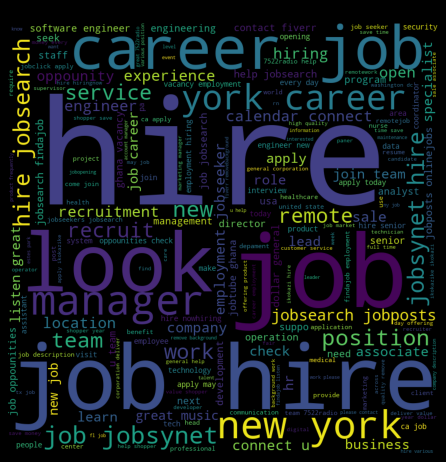

In [33]:
from wordcloud import WordCloud
def create_wordcloud(df):
    words = ''.join(list(df['lemma_str_text']))
    spam_wc = WordCloud(width = 800,height = 800).generate(words)
    plt.figure(figsize = (8,6),facecolor = 'k')
    plt.imshow(spam_wc)
    plt.axis('off')
    plt.tight_layout(pad = 0)
    plt.title('Word Cloud for the tweets in the text')
    plt.show()
    return
create_wordcloud(df)

In [34]:
words_in_tweet = [tweet.split() for tweet in df['text_clean']]
words_in_tweet[:2]

[['cloudcrem',
  '3recruitment',
  'careers',
  'jobs',
  'hiring',
  'vacancies',
  'tech',
  'techjobs',
  'technology',
  'manchester',
  'manchesterjobs',
  'mancs',
  'developer',
  'd…'],
 ['hiring',
  'is',
  'really',
  'staing',
  'to',
  'ramp',
  'up',
  'at',
  'vervoehq',
  'right',
  'now',
  'senior',
  'account',
  'exec',
  'sales',
  'development',
  'rep',
  'marketing',
  'designer',
  'want',
  'in',
  'hiring',
  'nowhiring',
  'jobs',
  'sales',
  'designerjobs',
  'salesjobs']]

In [35]:
import itertools
import collections

all_words_no_urls = list(itertools.chain(*words_in_tweet))

# Create counter
counts_no_urls = collections.Counter(all_words_no_urls)

counts_no_urls.most_common(15)

[('hiring', 1369),
 ('to', 648),
 ('and', 635),
 ('jobs', 630),
 ('in', 577),
 ('a', 567),
 ('for', 556),
 ('the', 489),
 ('job', 387),
 ('is', 372),
 ('are', 362),
 ('we', 310),
 ('new', 271),
 ('you', 270),
 ('of', 256)]

In [36]:
df_1 = pd.DataFrame(counts_no_urls.most_common(15),
                             columns=['text_words', 'text_count'])

df_1.head()

,text_words,text_count
0,hiring,1369
1,to,648
2,and,635
3,jobs,630
4,in,577


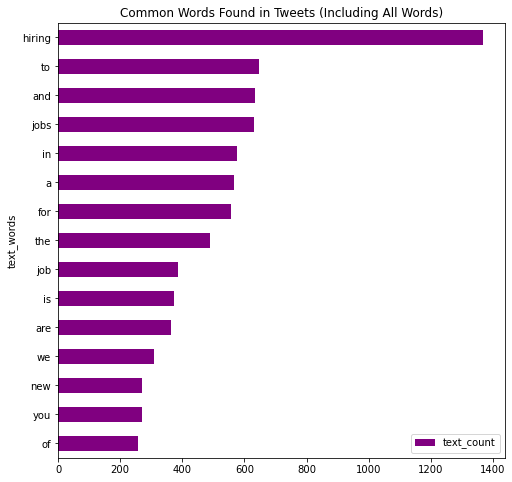

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
df_1.sort_values(by='text_count').plot.barh(x='text_words',
                      y='text_count',
                      ax=ax,
                      color="purple")

ax.set_title("Common Words Found in Tweets (Including All Words)")

plt.show()

In [38]:
words_in_str_tweet = [tweet.split() for tweet in df['lemma_str_text']]
words_in_str_tweet[:2]

[['cloudcrem',
  '3recruitment',
  'career',
  'job',
  'hire',
  'vacancy',
  'tech',
  'techjobs',
  'technology',
  'manchester',
  'manchesterjobs',
  'mancs',
  'developer',
  'd…'],
 ['hire',
  'really',
  'staing',
  'ramp',
  'vervoehq',
  'right',
  'senior',
  'account',
  'exec',
  'sale',
  'development',
  'rep',
  'marketing',
  'designer',
  'want',
  'hire',
  'nowhiring',
  'job',
  'sale',
  'designerjobs',
  'salesjobs']]

In [39]:
import itertools
import collections

all_words_no_urls_1 = list(itertools.chain(*words_in_str_tweet))

# Create counter
counts_no_urls_1 = collections.Counter(all_words_no_urls_1)

counts_no_urls_1.most_common(10)

[('hire', 1280),
 ('job', 1017),
 ('new', 272),
 ('career', 248),
 ('jobsearch', 238),
 ('apply', 209),
 ('team', 205),
 ('look', 203),
 ('manager', 161),
 ('hiring', 132)]

In [40]:
df_2 = pd.DataFrame(counts_no_urls_1.most_common(10),
                             columns=['lemma_text_words', 'clean_text_count'])

df_2.head()

,lemma_text_words,clean_text_count
0,hire,1280
1,job,1017
2,new,272
3,career,248
4,jobsearch,238


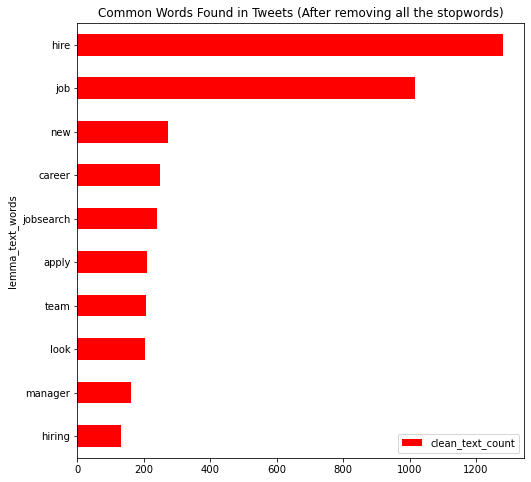

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
df_2.sort_values(by='clean_text_count').plot.barh(x='lemma_text_words',
                      y='clean_text_count',
                      ax=ax,
                      color="red")

ax.set_title("Common Words Found in Tweets (After removing all the stopwords)")

plt.show()

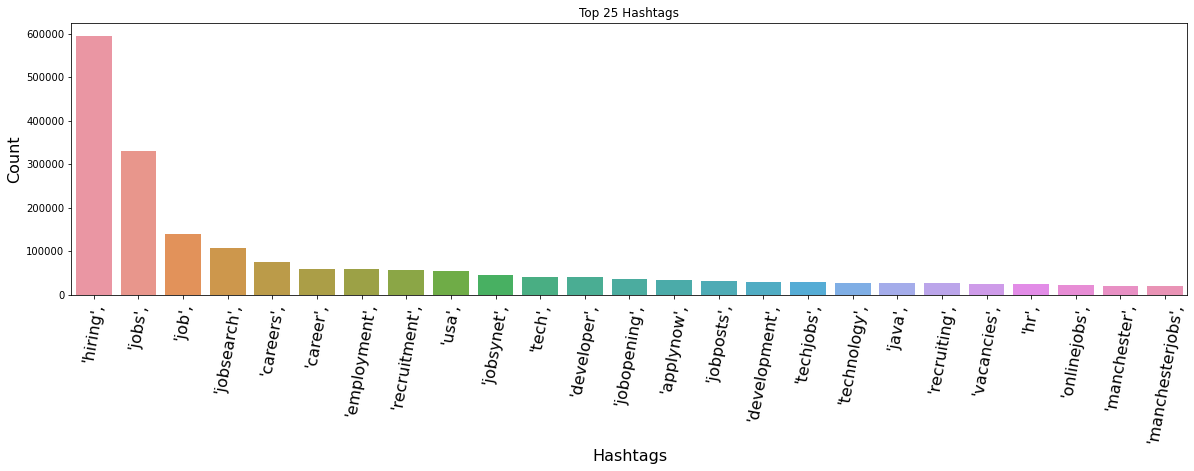

In [42]:
# Plotting top 25 hastags
hashtags = [tweet.split() for tweet in df['hashtags']]
hashtags = sum(hashtags, [])

def generate_hashtag_freqdist(hashtags):
    a = nltk.FreqDist(hashtags)
    d = pd.DataFrame({'Hashtag': list(a.keys()),
                      'Count': list(a.values())})
    # selecting top 25 most frequent hashtags     
    d = d.nlargest(columns = "Count", n = 25)
    plt.figure(figsize = (20,5))
    plt.title("Top 25 Hashtags")
    ax = sns.barplot(data = d, x = "Hashtag", y = "Count")
    plt.xticks(rotation = 80, fontsize = 16)
    ax.set_xlabel('Hashtags', fontsize = 16)
    ax.set_ylabel('Count', fontsize = 16)
    plt.show()
generate_hashtag_freqdist(hashtags)

In [43]:
# natural language processing: n-gram ranking
import re
import unicodedata
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt

In [44]:
def basic_clean(text):
  """
  A simple function to clean up the data. All the words that
  are not designated as a stop word is then lemmatized after
  encoding and basic regex parsing are performed.
  """
  wnl = nltk.stem.WordNetLemmatizer()
  stopwords = nltk.corpus.stopwords.words('english')
  text = (unicodedata.normalize('NFKD', text)
    .encode('ascii', 'ignore')
    .decode('utf-8', 'ignore')
    .lower())
  words = re.sub(r'[^\w\s]', '', text).split()
  return [wnl.lemmatize(word) for word in words if word not in stopwords]
words = basic_clean(''.join(str(df['text_lemmatized'].tolist())))

In [45]:
(pd.Series(nltk.ngrams(words, 2)).value_counts())[:10]

(job, hire)              241
(career, job)            100
(new, york)               95
(job, jobsynet)           83
(york, career)            83
(new, job)                74
(jobsynet, hire)          71
(hire, jobsearch)         71
(calendar, connect)       61
(jobsearch, jobposts)     59
dtype: int64

In [46]:
(pd.Series(nltk.ngrams(words, 3)).value_counts())[:10]

(york, career, job)                  83
(career, job, jobsynet)              83
(new, york, career)                  83
(job, jobsynet, hire)                71
(jobsynet, hire, jobsearch)          67
(hire, jobsearch, jobposts)          59
(calendar, connect, u)               46
(jobsearch, jobposts, onlinejobs)    38
(listen, great, music)               33
(help, jobsearch, findajob)          32
dtype: int64

In [47]:
bigrams_series = (pd.Series(nltk.ngrams(words, 2)).value_counts())[:12]
trigrams_series = (pd.Series(nltk.ngrams(words, 3)).value_counts())[:12]

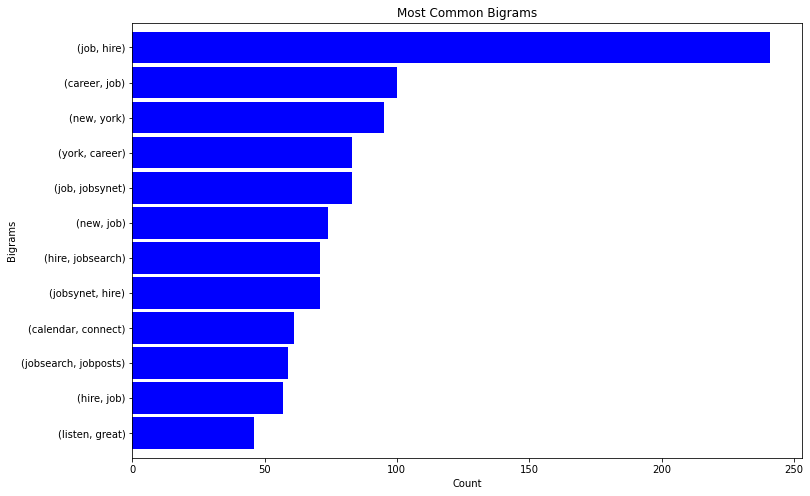

In [48]:
bigrams_series.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))
plt.title("Most Common Bigrams")
plt.xlabel("Count")
plt.ylabel("Bigrams")
plt.show()

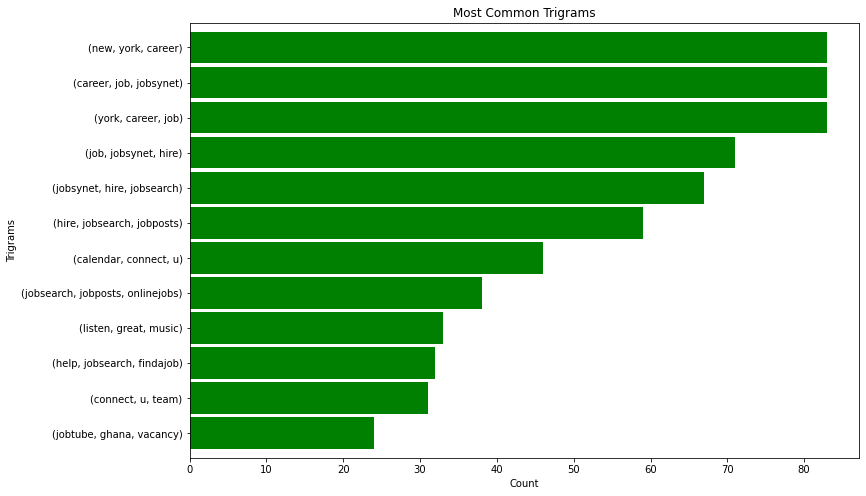

In [49]:
trigrams_series.sort_values().plot.barh(color='green', width=.9, figsize=(12, 8))
plt.title("Most Common Trigrams")
plt.xlabel("Count")
plt.ylabel("Trigrams")
plt.show()

In [50]:
# Tokenizing the tweet base description.

df['description_tokenized'] = df['description_clean'].apply(word_tokenize)

df.head()

,username,description,following,followers,text,likescount,retweetcount,date-time,hashtags,avg_word,stopwords,description_clean,text_clean,text_tokenized,text_stopwords_removed,text_pos_tags,text_wordnet_pos,text_lemmatized,lemma_str_text,description_tokenized
2,appitekbot,"hello, my name is asimov, i am a bot!\ni retweet #salesforce, #sfdc, and #salesforcedev! \n\nbuilt with ❤ by @appitekltd",1,1134,rt @cloudcrem: 3#recruitment #careers #jobs #hiring #vacancies #tech #techjobs #technology #manchester #manchesterjobs #mancs #developer #d…,0,2,2021-04-29 05:41:20,"['soap', 'rest', 'hiring', 'jobs', 'tsawwassen', 'careers', 'jobs', 'hiring', 'careers', 'jobs', 'hiring', 'vacancies', 'tech', 'techjobs', 'technology', 'manchester', 'manchesterjobs', 'mancs', 'developer']",7.357143,0,hello my name is asimov i am a boti retweet salesforce sfdc and salesforcedev built with by appitekltd,cloudcrem 3recruitment careers jobs hiring vacancies tech techjobs technology manchester manchesterjobs mancs developer d…,"[cloudcrem, 3recruitment, careers, jobs, hiring, vacancies, tech, techjobs, technology, manchester, manchesterjobs, mancs, developer, d…]","[cloudcrem, 3recruitment, careers, jobs, hiring, vacancies, tech, techjobs, technology, manchester, manchesterjobs, mancs, developer, d…]","[(cloudcrem, NN), (3recruitment, CD), (careers, NNS), (jobs, NNS), (hiring, VBG), (vacancies, NNS), (tech, VBP), (techjobs, JJ), (technology, NN), (manchester, NN), (manchesterjobs, VBD), (mancs, JJ), (developer, NN), (d…, NN)]","[(cloudcrem, n), (3recruitment, n), (careers, n), (jobs, n), (hiring, v), (vacancies, n), (tech, v), (techjobs, a), (technology, n), (manchester, n), (manchesterjobs, v), (mancs, a), (developer, n), (d…, n)]","[cloudcrem, 3recruitment, career, job, hire, vacancy, tech, techjobs, technology, manchester, manchesterjobs, mancs, developer, d…]",cloudcrem 3recruitment career job hire vacancy tech techjobs technology manchester manchesterjobs mancs developer d…,"[hello, my, name, is, asimov, i, am, a, boti, retweet, salesforce, sfdc, and, salesforcedev, built, with, by, appitekltd]"
5,omermolad,"israeli in melbourne. co-founder and ceo @vervoehq. we make hiring about merit, not background. living the dream.",297,541,hiring is really starting to ramp up at @vervoehq right now:\n\n- senior account exec 🚀\n- sales development rep 🧨\n- marketing designer 👩🏽‍🎨\n\nwant in? \n\n#hiring #nowhiring #jobs #sales #designerjobs #salesjobs,0,0,2021-04-29 05:40:41,"['soap', 'rest', 'hiring', 'jobs', 'tsawwassen', 'careers', 'jobs', 'hiring', 'careers', 'jobs', 'hiring', 'vacancies', 'tech', 'techjobs', 'technology', 'manchester', 'manchesterjobs', 'mancs', 'developer', 'careers', 'jobs', 'hiring', 'vacancies', 'tech', 'techjobs', 'technology', 'manchester', 'manchesterjobs', 'mancs', 'developer', 'hiring', 'jobs', 'delta', 'hiring', 'nowhiring', 'jobs', 'sales', 'designerjobs', 'salesjobs']",6.190476,4,israeli in melbourne cofounder and ceo vervoehq we make hiring about merit not background living the dream,hiring is really staing to ramp up at vervoehq right now senior account exec sales development rep marketing designer want in hiring nowhiring jobs sales designerjobs salesjobs,"[hiring, is, really, staing, to, ramp, up, at, vervoehq, right, now, senior, account, exec, sales, development, rep, marketing, designer, want, in, hiring, nowhiring, jobs, sales, designerjobs, salesjobs]","[hiring, really, staing, ramp, vervoehq, right, senior, account, exec, sales, development, rep, marketing, designer, want, hiring, nowhiring, jobs, sales, designerjobs, salesjobs]","[(hiring, VBG), (really, RB), (staing, VBG), (ramp, NN), (vervoehq, NN), (right, RB), (senior, JJ), (account, NN), (exec, VBD), (sales, NNS), (development, NN), (rep, NN), (marketing, NN), (designer, NN), (want, VBP), (hiring, VBG), (nowhiring, VBG), (jobs, NNS), (sales, NNS), (designerjobs, VBP), (salesjobs, NN)]","[(hiring, v), (really, r), (staing, v), (ramp, n), (vervoehq, n), (right, r)

In [51]:
# Removing stopwords.

df['description_stopwords_removed'] = df['description_tokenized'].apply(
    lambda x: [word for word in x if word not in stop])

df.head()

,username,description,following,followers,text,likescount,retweetcount,date-time,hashtags,avg_word,stopwords,description_clean,text_clean,text_tokenized,text_stopwords_removed,text_pos_tags,text_wordnet_pos,text_lemmatized,lemma_str_text,description_tokenized,description_stopwords_removed
2,appitekbot,"hello, my name is asimov, i am a bot!\ni retweet #salesforce, #sfdc, and #salesforcedev! \n\nbuilt with ❤ by @appitekltd",1,1134,rt @cloudcrem: 3#recruitment #careers #jobs #hiring #vacancies #tech #techjobs #technology #manchester #manchesterjobs #mancs #developer #d…,0,2,2021-04-29 05:41:20,"['soap', 'rest', 'hiring', 'jobs', 'tsawwassen', 'careers', 'jobs', 'hiring', 'careers', 'jobs', 'hiring', 'vacancies', 'tech', 'techjobs', 'technology', 'manchester', 'manchesterjobs', 'mancs', 'developer']",7.357143,0,hello my name is asimov i am a boti retweet salesforce sfdc and salesforcedev built with by appitekltd,cloudcrem 3recruitment careers jobs hiring vacancies tech techjobs technology manchester manchesterjobs mancs developer d…,"[cloudcrem, 3recruitment, careers, jobs, hiring, vacancies, tech, techjobs, technology, manchester, manchesterjobs, mancs, developer, d…]","[cloudcrem, 3recruitment, careers, jobs, hiring, vacancies, tech, techjobs, technology, manchester, manchesterjobs, mancs, developer, d…]","[(cloudcrem, NN), (3recruitment, CD), (careers, NNS), (jobs, NNS), (hiring, VBG), (vacancies, NNS), (tech, VBP), (techjobs, JJ), (technology, NN), (manchester, NN), (manchesterjobs, VBD), (mancs, JJ), (developer, NN), (d…, NN)]","[(cloudcrem, n), (3recruitment, n), (careers, n), (jobs, n), (hiring, v), (vacancies, n), (tech, v), (techjobs, a), (technology, n), (manchester, n), (manchesterjobs, v), (mancs, a), (developer, n), (d…, n)]","[cloudcrem, 3recruitment, career, job, hire, vacancy, tech, techjobs, technology, manchester, manchesterjobs, mancs, developer, d…]",cloudcrem 3recruitment career job hire vacancy tech techjobs technology manchester manchesterjobs mancs developer d…,"[hello, my, name, is, asimov, i, am, a, boti, retweet, salesforce, sfdc, and, salesforcedev, built, with, by, appitekltd]","[hello, name, asimov, boti, retweet, salesforce, sfdc, salesforcedev, built, appitekltd]"
5,omermolad,"israeli in melbourne. co-founder and ceo @vervoehq. we make hiring about merit, not background. living the dream.",297,541,hiring is really starting to ramp up at @vervoehq right now:\n\n- senior account exec 🚀\n- sales development rep 🧨\n- marketing designer 👩🏽‍🎨\n\nwant in? \n\n#hiring #nowhiring #jobs #sales #designerjobs #salesjobs,0,0,2021-04-29 05:40:41,"['soap', 'rest', 'hiring', 'jobs', 'tsawwassen', 'careers', 'jobs', 'hiring', 'careers', 'jobs', 'hiring', 'vacancies', 'tech', 'techjobs', 'technology', 'manchester', 'manchesterjobs', 'mancs', 'developer', 'careers', 'jobs', 'hiring', 'vacancies', 'tech', 'techjobs', 'technology', 'manchester', 'manchesterjobs', 'mancs', 'developer', 'hiring', 'jobs', 'delta', 'hiring', 'nowhiring', 'jobs', 'sales', 'designerjobs', 'salesjobs']",6.190476,4,israeli in melbourne cofounder and ceo vervoehq we make hiring about merit not background living the dream,hiring is really staing to ramp up at vervoehq right now senior account exec sales development rep marketing designer want in hiring nowhiring jobs sales designerjobs salesjobs,"[hiring, is, really, staing, to, ramp, up, at, vervoehq, right, now, senior, account, exec, sales, development, rep, marketing, designer, want, in, hiring, nowhiring, jobs, sales, designerjobs, salesjobs]","[hiring, really, staing, ramp, vervoehq, right, senior, account, exec, sales, development, rep, marketing, designer, want, hiring, nowhiring, jobs, sales, designerjobs, salesjobs]","[(hiring, VBG), (really, RB), (staing, VBG), (ramp, NN), (vervoehq, NN), (right, RB), (senior, JJ), (account, NN), (exec, VBD), (sales, NNS), (development, NN), (rep, NN), (marketing, NN), (designer, NN), (want, VBP), (hiring, VBG), (nowhiring, VBG), (jobs, NNS), (sales, N

In [52]:
# Applying word lemmatizer.

wnl = WordNetLemmatizer()

df['description_lemmatized'] = df['description_stopwords_removed'].apply(
    lambda x: [wnl.lemmatize(word) for word in x])

df['description_lemmatized'] = df['description_lemmatized'].apply(
    lambda x: [word for word in x if word not in stop])

df['description_str_text'] = [' '.join(map(str, l)) for l in df['description_lemmatized']]

df.head()

,username,description,following,followers,text,likescount,retweetcount,date-time,hashtags,avg_word,stopwords,description_clean,text_clean,text_tokenized,text_stopwords_removed,text_pos_tags,text_wordnet_pos,text_lemmatized,lemma_str_text,description_tokenized,description_stopwords_removed,description_lemmatized,description_str_text
2,appitekbot,"hello, my name is asimov, i am a bot!\ni retweet #salesforce, #sfdc, and #salesforcedev! \n\nbuilt with ❤ by @appitekltd",1,1134,rt @cloudcrem: 3#recruitment #careers #jobs #hiring #vacancies #tech #techjobs #technology #manchester #manchesterjobs #mancs #developer #d…,0,2,2021-04-29 05:41:20,"['soap', 'rest', 'hiring', 'jobs', 'tsawwassen', 'careers', 'jobs', 'hiring', 'careers', 'jobs', 'hiring', 'vacancies', 'tech', 'techjobs', 'technology', 'manchester', 'manchesterjobs', 'mancs', 'developer']",7.357143,0,hello my name is asimov i am a boti retweet salesforce sfdc and salesforcedev built with by appitekltd,cloudcrem 3recruitment careers jobs hiring vacancies tech techjobs technology manchester manchesterjobs mancs developer d…,"[cloudcrem, 3recruitment, careers, jobs, hiring, vacancies, tech, techjobs, technology, manchester, manchesterjobs, mancs, developer, d…]","[cloudcrem, 3recruitment, careers, jobs, hiring, vacancies, tech, techjobs, technology, manchester, manchesterjobs, mancs, developer, d…]","[(cloudcrem, NN), (3recruitment, CD), (careers, NNS), (jobs, NNS), (hiring, VBG), (vacancies, NNS), (tech, VBP), (techjobs, JJ), (technology, NN), (manchester, NN), (manchesterjobs, VBD), (mancs, JJ), (developer, NN), (d…, NN)]","[(cloudcrem, n), (3recruitment, n), (careers, n), (jobs, n), (hiring, v), (vacancies, n), (tech, v), (techjobs, a), (technology, n), (manchester, n), (manchesterjobs, v), (mancs, a), (developer, n), (d…, n)]","[cloudcrem, 3recruitment, career, job, hire, vacancy, tech, techjobs, technology, manchester, manchesterjobs, mancs, developer, d…]",cloudcrem 3recruitment career job hire vacancy tech techjobs technology manchester manchesterjobs mancs developer d…,"[hello, my, name, is, asimov, i, am, a, boti, retweet, salesforce, sfdc, and, salesforcedev, built, with, by, appitekltd]","[hello, name, asimov, boti, retweet, salesforce, sfdc, salesforcedev, built, appitekltd]","[hello, name, asimov, boti, retweet, salesforce, sfdc, salesforcedev, built, appitekltd]",hello name asimov boti retweet salesforce sfdc salesforcedev built appitekltd
5,omermolad,"israeli in melbourne. co-founder and ceo @vervoehq. we make hiring about merit, not background. living the dream.",297,541,hiring is really starting to ramp up at @vervoehq right now:\n\n- senior account exec 🚀\n- sales development rep 🧨\n- marketing designer 👩🏽‍🎨\n\nwant in? \n\n#hiring #nowhiring #jobs #sales #designerjobs #salesjobs,0,0,2021-04-29 05:40:41,"['soap', 'rest', 'hiring', 'jobs', 'tsawwassen', 'careers', 'jobs', 'hiring', 'careers', 'jobs', 'hiring', 'vacancies', 'tech', 'techjobs', 'technology', 'manchester', 'manchesterjobs', 'mancs', 'developer', 'careers', 'jobs', 'hiring', 'vacancies', 'tech', 'techjobs', 'technology', 'manchester', 'manchesterjobs', 'mancs', 'developer', 'hiring', 'jobs', 'delta', 'hiring', 'nowhiring', 'jobs', 'sales', 'designerjobs', 'salesjobs']",6.190476,4,israeli in melbourne cofounder and ceo vervoehq we make hiring about merit not background living the dream,hiring is really staing to ramp up at vervoehq right now senior account exec sales development rep marketing designer want in hiring nowhiring jobs sales designerjobs salesjobs,"[hiring, is, really, staing, to, ramp, up, at, vervoehq, right, now, senior, account, exec, sales, development, rep, marketing, designer, want, in, hiring, nowhiring, jobs, sales, designerjobs, salesjobs]","[hiring, really, staing, ramp, vervoehq, right, senior, account, exec, sales, development, rep, marketing, designer, want, hiring, nowhiring, jobs, sales, designerjobs, salesjobs]","[(hiring, VBG), (really, RB), (staing, VBG), (ramp, NN), (ve

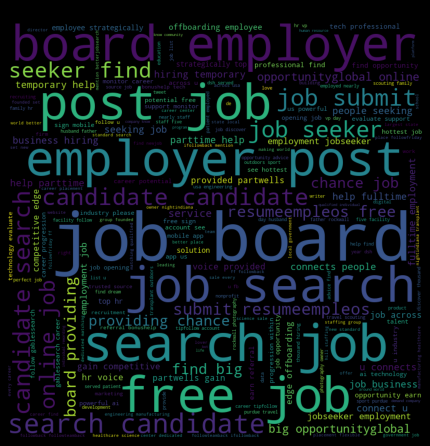

In [53]:
from wordcloud import WordCloud
def create_wordcloud(df):
    words = ''.join(list(df['description_str_text']))
    spam_wc = WordCloud(width = 800,height = 800).generate(words)
    plt.figure(figsize = (8,6),facecolor = 'k')
    plt.title('Word Cloud for the tweets in the description')
    plt.imshow(spam_wc)
    plt.axis('off')
    plt.tight_layout(pad = 0)
    plt.show()
    return
create_wordcloud(df)

In [54]:
df['target'] = 1
df.head()

,username,description,following,followers,text,likescount,retweetcount,date-time,hashtags,avg_word,stopwords,description_clean,text_clean,text_tokenized,text_stopwords_removed,text_pos_tags,text_wordnet_pos,text_lemmatized,lemma_str_text,description_tokenized,description_stopwords_removed,description_lemmatized,description_str_text,target
2,appitekbot,"hello, my name is asimov, i am a bot!\ni retweet #salesforce, #sfdc, and #salesforcedev! \n\nbuilt with ❤ by @appitekltd",1,1134,rt @cloudcrem: 3#recruitment #careers #jobs #hiring #vacancies #tech #techjobs #technology #manchester #manchesterjobs #mancs #developer #d…,0,2,2021-04-29 05:41:20,"['soap', 'rest', 'hiring', 'jobs', 'tsawwassen', 'careers', 'jobs', 'hiring', 'careers', 'jobs', 'hiring', 'vacancies', 'tech', 'techjobs', 'technology', 'manchester', 'manchesterjobs', 'mancs', 'developer']",7.357143,0,hello my name is asimov i am a boti retweet salesforce sfdc and salesforcedev built with by appitekltd,cloudcrem 3recruitment careers jobs hiring vacancies tech techjobs technology manchester manchesterjobs mancs developer d…,"[cloudcrem, 3recruitment, careers, jobs, hiring, vacancies, tech, techjobs, technology, manchester, manchesterjobs, mancs, developer, d…]","[cloudcrem, 3recruitment, careers, jobs, hiring, vacancies, tech, techjobs, technology, manchester, manchesterjobs, mancs, developer, d…]","[(cloudcrem, NN), (3recruitment, CD), (careers, NNS), (jobs, NNS), (hiring, VBG), (vacancies, NNS), (tech, VBP), (techjobs, JJ), (technology, NN), (manchester, NN), (manchesterjobs, VBD), (mancs, JJ), (developer, NN), (d…, NN)]","[(cloudcrem, n), (3recruitment, n), (careers, n), (jobs, n), (hiring, v), (vacancies, n), (tech, v), (techjobs, a), (technology, n), (manchester, n), (manchesterjobs, v), (mancs, a), (developer, n), (d…, n)]","[cloudcrem, 3recruitment, career, job, hire, vacancy, tech, techjobs, technology, manchester, manchesterjobs, mancs, developer, d…]",cloudcrem 3recruitment career job hire vacancy tech techjobs technology manchester manchesterjobs mancs developer d…,"[hello, my, name, is, asimov, i, am, a, boti, retweet, salesforce, sfdc, and, salesforcedev, built, with, by, appitekltd]","[hello, name, asimov, boti, retweet, salesforce, sfdc, salesforcedev, built, appitekltd]","[hello, name, asimov, boti, retweet, salesforce, sfdc, salesforcedev, built, appitekltd]",hello name asimov boti retweet salesforce sfdc salesforcedev built appitekltd,1
5,omermolad,"israeli in melbourne. co-founder and ceo @vervoehq. we make hiring about merit, not background. living the dream.",297,541,hiring is really starting to ramp up at @vervoehq right now:\n\n- senior account exec 🚀\n- sales development rep 🧨\n- marketing designer 👩🏽‍🎨\n\nwant in? \n\n#hiring #nowhiring #jobs #sales #designerjobs #salesjobs,0,0,2021-04-29 05:40:41,"['soap', 'rest', 'hiring', 'jobs', 'tsawwassen', 'careers', 'jobs', 'hiring', 'careers', 'jobs', 'hiring', 'vacancies', 'tech', 'techjobs', 'technology', 'manchester', 'manchesterjobs', 'mancs', 'developer', 'careers', 'jobs', 'hiring', 'vacancies', 'tech', 'techjobs', 'technology', 'manchester', 'manchesterjobs', 'mancs', 'developer', 'hiring', 'jobs', 'delta', 'hiring', 'nowhiring', 'jobs', 'sales', 'designerjobs', 'salesjobs']",6.190476,4,israeli in melbourne cofounder and ceo vervoehq we make hiring about merit not background living the dream,hiring is really staing to ramp up at vervoehq right now senior account exec sales development rep marketing designer want in hiring nowhiring jobs sales designerjobs salesjobs,"[hiring, is, really, staing, to, ramp, up, at, vervoehq, right, now, senior, account, exec, sales, development, rep, marketing, designer, want, in, hiring, nowhiring, jobs, sales, designerjobs, salesjobs]","[hiring, really, staing, ramp, vervoehq, right, senior, account, exec, sales, development, rep, marketing, designer, want, hiring, nowhiring, jobs, sales, designerjobs, salesjobs]","[(hiring, VBG), (really, RB), (staing, VBG), (ramp,

In [55]:
df.to_excel("job_analysis_tweets.xlsx")